<a href="https://colab.research.google.com/github/Zerowl7/data_analys_test/blob/main/Segmentation_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd


In [5]:
online = pd.read_csv('online.csv')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom,12.60
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom,1.45
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom,22.50
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom,2.10
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom,17.85


Датасет, предполагает клиентов, мы должны их сегментировать и сделать тепловую карту

In [6]:
import datetime as dt

In [7]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68176 entries, 0 to 68175
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    68176 non-null  int64  
 1   StockCode    68176 non-null  object 
 2   Description  68176 non-null  object 
 3   Quantity     68176 non-null  int64  
 4   InvoiceDate  68176 non-null  object 
 5   UnitPrice    68176 non-null  float64
 6   CustomerID   68176 non-null  int64  
 7   Country      68176 non-null  object 
 8   TotalSum     68176 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 4.7+ MB


Преобразуем дату

In [8]:
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

Уникальные клиенты

In [9]:
online.CustomerID.nunique()

3643

In [10]:
# функция, которая анализирует дату
def get_day(x): return dt.datetime(x.year, x.month, x.day) 

# Делаем колонку для функции
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 

# Зависимость между Клиентами и новой колонкой
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# минимальное значение InvoiceDay для набора данных
online['CohortDay'] = grouping.transform('min')

# View the top 5 rows
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceDay,CohortDay
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom,12.60,2011-10-25,2011-04-11
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom,1.45,2011-11-20,2011-09-12
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom,22.50,2011-07-14,2011-07-14
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom,2.10,2011-11-23,2011-11-23
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom,17.85,2011-05-25,2011-02-25


# Расчитываем смещение в днях

In [11]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [12]:
# Получить целые числа для частей даты из столбца `InvoiceDay`
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

# Получить целые числа для частей даты из столбца `CohortDay`
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

In [13]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Извлечь разницу в днях из всех предыдущих значений
online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1

In [14]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceDay,CohortDay,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom,12.60,2011-10-25,2011-04-11,195
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom,1.45,2011-11-20,2011-09-12,69
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom,22.50,2011-07-14,2011-07-14,1
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom,2.10,2011-11-23,2011-11-23,1
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom,17.85,2011-05-25,2011-02-25,91


In [15]:
years_diff[:10], months_diff[:10], days_diff[:10]

(0    0
 1    0
 2    0
 3    0
 4    0
 5    0
 6    0
 7    0
 8    1
 9    1
 dtype: int64, 0    6
 1    2
 2    0
 3    0
 4    3
 5    0
 6    9
 7    2
 8   -9
 9   -7
 dtype: int64, 0    14
 1     8
 2     0
 3     0
 4     0
 5     0
 6     0
 7     6
 8     7
 9    -1
 dtype: int64)

Ретеншион даёт процент активных клиентов по сравнению с общим количеством клиентов.

# Retention

In [17]:
# Define a function that will parse the date
def get_month(x): return dt.datetime(x.year, x.month, 1) 

# Create InvoiceDay column
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month) 

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceMonth'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortMonth'] = grouping.transform('min')

# View the top 5 rows
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceDay,CohortDay,CohortIndex,InvoiceMonth,CohortMonth
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom,12.60,2011-10-25,2011-04-11,195,2011-10-01,2011-04-01
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom,1.45,2011-11-20,2011-09-12,69,2011-11-01,2011-09-01
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom,22.50,2011-07-14,2011-07-14,1,2011-07-01,2011-07-01
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom,2.10,2011-11-23,2011-11-23,1,2011-11-01,2011-11-01
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom,17.85,2011-05-25,2011-02-25,91,2011-05-01,2011-02-01


In [18]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

In [20]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Создать сводку
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [21]:
retention.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,356,357,358,359,360,361,362,363,364,365
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-12-01,1.0,0.007833,0.018277,0.018277,0.018277,0.018277,0.026110,0.023499,0.010444,0.002611,...,0.046997,0.02611,0.046997,0.036554,0.02611,0.028721,0.010444,0.002611,0.007833,0.002611
2011-01-01,1.0,NaN,0.002331,0.004662,0.009324,NaN,NaN,0.006993,0.002331,0.004662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-01,1.0,NaN,NaN,0.002841,NaN,0.008523,0.002841,0.005682,0.005682,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-01,1.0,NaN,0.002370,NaN,0.004739,0.004739,NaN,0.004739,0.002370,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-01,1.0,NaN,0.003584,NaN,0.003584,NaN,0.003584,0.003584,0.003584,0.003584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Рассчитать среднюю цену

In [22]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Рассчитать среднее значение столбца цены за единицу
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
display(average_quantity.round(1))

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,356,357,358,359,360,361,362,363,364,365
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-12-01,3.1,2.7,2.7,2.9,4.8,8.2,4.0,3.9,3.2,6.0,...,2.7,2.2,2.6,3.4,2.3,3.0,4.6,2.8,2.7,1.5
2011-01-01,3.2,NaN,2.2,3.4,4.4,NaN,NaN,2.2,1.1,2.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-01,3.1,NaN,NaN,1.4,NaN,0.9,0.7,2.7,5.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-01,3.3,NaN,3.0,NaN,1.1,2.3,NaN,4.8,1.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-01,3.3,NaN,0.4,NaN,3.8,NaN,1.7,8.2,5.6,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-01,3.3,4.1,NaN,NaN,6.0,4.8,NaN,2.6,NaN,0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-01,2.8,2.1,3.2,NaN,NaN,NaN,2.8,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,3.2,NaN,NaN,NaN,1.0,NaN,0.8,1.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,2.9,NaN,6.0,5.0,NaN,NaN,NaN,2.1,NaN,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Визуализация показателя среднего значения


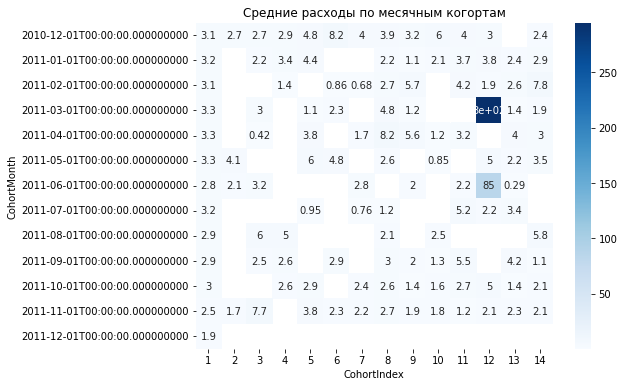

In [23]:
# Import seaborn package as sns
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Средние расходы по месячным когортам')

# Create the heatmap
sns.heatmap(average_quantity.loc[:,:14], annot=True, cmap='Blues')
plt.show()

# 2 часть

In [24]:
data = pd.read_csv('customers.csv')

In [25]:
data.head()

,Unnamed: 0,CustomerID,Spend
0,0,0,137
1,1,1,335
2,2,2,172
3,3,3,355
4,4,4,303


# Рассичтать квартили (q = 4)

In [26]:
spend_quartile = pd.qcut(data['Spend'], q=4, labels=range(1,5))


data['Spend_Quartile'] = spend_quartile


print(data.sort_values('Spend'))

   Unnamed: 0  CustomerID  Spend Spend_Quartile
0           0           0    137              1
2           2           2    172              1
7           7           7    229              2
5           5           5    233              2
6           6           6    244              3
4           4           4    303              3
1           1           1    335              4
3           3           3    355              4


# Рассчитать значения RFM

In [28]:

online = pd.read_csv('online.csv')

In [29]:
snapshot_date = pd.Timestamp(2011,12,10)

In [30]:
snapshot_date

Timestamp('2011-12-10 00:00:00')

In [31]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom,12.60
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom,1.45
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom,22.50
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom,2.10
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom,17.85


In [32]:
online['InvoiceDate'] = pd.to_datetime(online.InvoiceDate)

In [34]:
datamart = online.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})


datamart.rename(columns={'InvoiceDate': 'Новизна',
                         'InvoiceNo': 'Частота',
                         'TotalSum': 'Стоимость'}, inplace=True)


print(datamart.head())

            Новизна  Частота  Стоимость
CustomerID                             
12747             3       25     948.70
12748             1      888    7046.16
12749             4       37     813.45
12820             4       17     268.02
12822            71        9     146.15


# Рассчитать 3 группы для новизны и частоты

In [37]:
r_labels = range(3, 0, -1); f_labels = range(1, 4)


r_groups = pd.qcut(datamart['Новизна'], q=3, labels=r_labels)


f_groups = pd.qcut(datamart['Частота'], q=3, labels=f_labels)


datamart = datamart.assign(R=r_groups.values, F=f_groups.values)

In [38]:
datamart.head()

,Новизна,Частота,Стоимость,R,F
CustomerID,,,,,
12747,3,25,948.70,3,3
12748,1,888,7046.16,3,3
12749,4,37,813.45,3,3
12820,4,17,268.02,3,3
12822,71,9,146.15,2,2
